### DAG

DA: Es una directed graph (los ejes tienen una direccion particular) <br>
Un DAG es una directed graph  y que no tiene ciclos <br> <br> 

La utilidad de un DAG es que se puede ordenar linealmente (se puede dibujar en una linea recta en la que solo hay lineas que van de izquierda a derecha y no de regreso). Esto no se puede en graphs que tengan ciclos
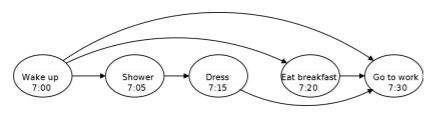

### Sort Topologico 

$\textbf{Source}$: Es un vertice que no tiene ejes entrantes <br> 
$\textbf{Sink}$: Un sink es un vertice que no tiene salidas <br> 

Queremos empezar con un DAG y dibujarlo linealmente. Viendo el dibujo de arriba, notamos que el ultimo nodo tiene que ser un sink. Lo que hacemos es separar este sink del graph y ponerlo al final del arreglo lineal y luego buscar un sink en el nuevo graph de nuevo y as'i. <br> 

1) Find Sink: Para hacerlo, podemos ir siguiendo una exploracion hasta que toquemos fondo.  <br>
2) Poner al final del grafo lineal que se quiere construir. <br>
3) Remover del grafo <br>
4) Repetir <br> 

Podemos mejorarlo tomando en cuenta que no hay que irnos totalmente hacia atras luego de encontrar un sink, sino que podemos hacer un DFS y usar un postivisit y list <br>


##### Algoritmo Topo Sort
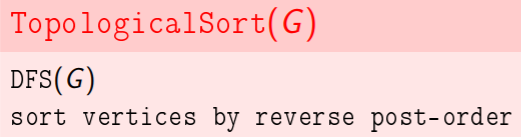


### Directed Graphs
En las graphs directed, los ejes tienen una direccion particular <br> <br>
Con ello, decir que v~w si se puede llegar a w desde v ya no es una relacion de equivalencia (no cumple simetria por ejemplo) <br> 

Definimos que v y w est'an $\textbf{conectados}$ si se puede llegar a w desde v y se puede llegar a v desde w. Esta relacion si es de equivalencia, lo que nos permite definir: <br>  <br>

###### Componentes fuertemente conexos
Un grafo directed se puede particionar en componentes fuertemente conexos. Donde dos vertices estas en el mismo componente sii est'an conectados (con la def. de arriba)
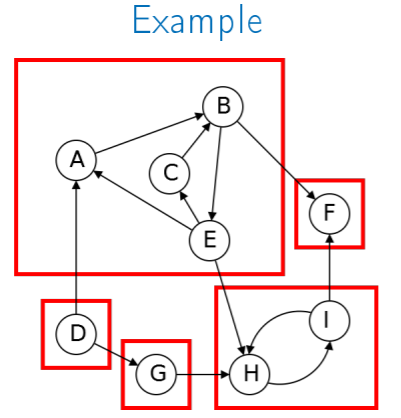

O por ejemplo, podemos ver que los vertices rojos son el componente fuertemente conexo de A (o de E,B,F,G,H)
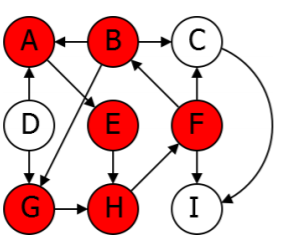

###### Metagrafos:
Podemos tambien dibujar un metagrafo a partir del grafo original. Por ejemplo, a partir del grafo de la primera imagen, su metagrafo es:
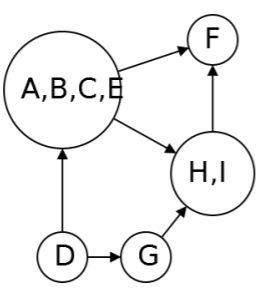

Y este metagrafo es nuevamente un DAG (pues si tuviera un ciclo, las partes en el ciclo deber'ian de estar en el mismo cfc).

## Calcular los Componentes Fuertemente Conexos

Nos dan un grafo dirigido y queremos calcular cuales son los componentes fuertemente conexos. Se nos ocurre una primera opcion.
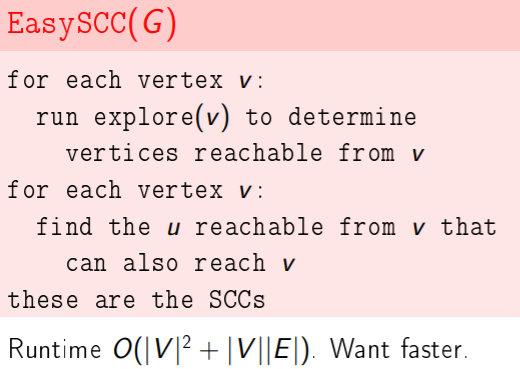

#### Sink Component 
Si v esta en un componente fuertemente conexo que sea un sink del metagrafo (Como el F en el de arriba), entonces explor(v) encuentra todos los vertices que se pueden llegar desde v y estos coinciden con el CFC de v (porque explore(v) no se puede escapar de este CFC por ser un metasink).
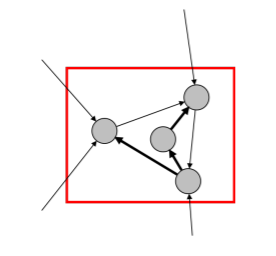
Esto nos permite calcular todo el CFC de v usando solo un explor. 

Se puede ver que si hacemos un DFS con preorder y postorder en el grapho, entonces el elemento con mayor postorder (es decir, el ultimo elemento que dejamos) pertenece a un CFC del metagraph que es un source. <br>  <br>

$\textbf{Reverse Graph}$: Dado un grapho G, podemos sacar su grafo reverso al darle la vuelta a todos los ejes y lo denotamos G^R.  <br>
Tanto G como G^R tienen los mismos CFC pero los metasources en G^R son los metasinks de G. <br><br>

Entonces, el vertice con mayor postorder en G^R esta en un metasource de G^R y por tanto en un metasink de G, que es justo lo que se buscaba. <br><br>

#### Algoritmo Basico:

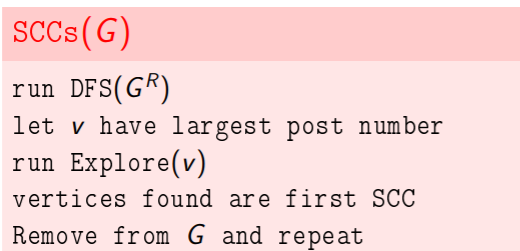

Ejemplo. Empezamos con el siguiente grafo y le hacemos el DFS con postorder y preorder a su G^R (no mostrado aqui)
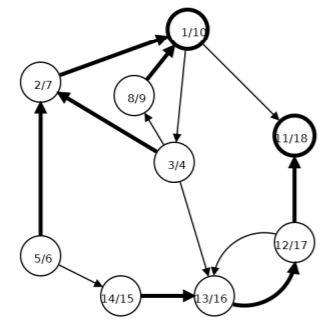

Luego, el que tenga mayor postorder (11/18), pertenece a un SCC que es un metasink del metagrafo original. Entonces, empezamos en este vertice del grafo y le calculamos todo su explore, que por lo dicho antes, por ser un metasink, el explor(v) va a coincidir con todo el SCC. Resulta que su SCC es solo 11/18. <br> <br> 
Luego, nos vamos al postorder anterior (el de 12/17) y ahora calculamos su explore (omitiendo el SCC que ya sacamos antes, por lo que ahora 12/17 es un metasink). Entonces, calculamos su explore y eso es igual a todo el SCC. Entonces, hasta el momento nos queda:
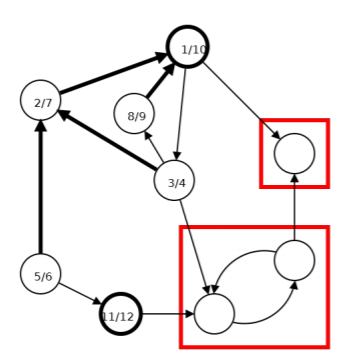
Y seguimos as'i hasta que obtenemos

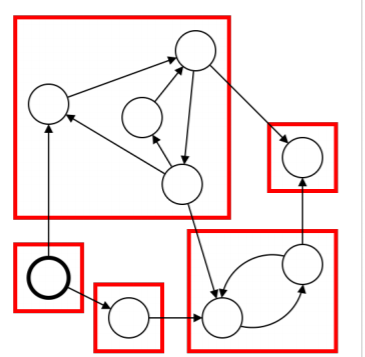


Podemos optimizar un poco mas el algoritmo como sigue:
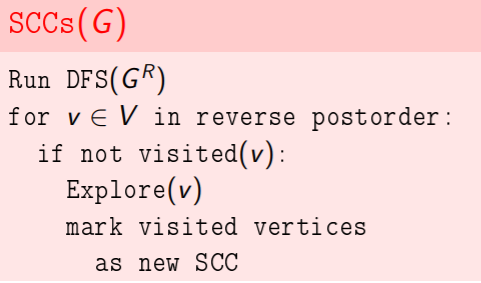

Tiene ahora un runtime de O(|V|+|E|)

# Ejercicios 

### 1. Consistencia de un grafo
Nos dan un grafo y tenemos que poner un 1 si contiene un ciclo y un 0 si no contiene un ciclo

In [1]:
'''
Graph Representation in programming assignments: Igual que en el primero del anterior
pero a veces seran unidireccionales.'''
# Checking Consistency of CS curriculum.
''' Cada vertice es una materia del curriculum y cada edge direccionado indica
un prerrequisito. Checa que no haya ciclos pues seria una contradiccion.'''
#Checar que un grafo es un DAG

#Guarda los nodos y su lista de conexiones
class nodos:
    def __init__(self, ind, conex):
        self.ind = ind
        self.conex = conex
        self.visitado = 0


n , m = [int(x) for x in input().split()]

#Crea una lista de vertices con lista de vertices conectados.
#Son n vertices numerados de 0 a n-1. 
vertices = [nodos(i,[]) for i in range(n)]

#Vamos viendo los ejes. la primera entrada es el vertice de entrada(p-1 por la numeracion)
#No guardamos la segunda conexion (la inversa)


for i in range(m):
    p , q = [int(x) for x in input().split()]
    vertices[p-1].conex.append(q-1)


#Tosma un objeto de vertices y le dice que si est'a visitado
#Luego va buscando en la lista de conectados de v y si el vertice correspondiente
#no est'a explorado, entonces lo explora.
stop = []
def Explora(ver, vertices, recstack):
    #Agrega el indice a una lista (la cual mantiene a los elementos del ultimo camino)
    ver.visitado = 1
    recstack.append(ver.ind)
    #Para cada vertice conectado a ver
    for w in ver.conex:
        #Si el w ya fue visitado y esta en el stack, es porque ya se cerro un ciclo
        if vertices[w].visitado == 1 and w in recstack:
            #Le pone una marca al stop 
            stop.append(1)
            #Regresa un 1
            return (1)
        #Si el w no fue visitado, lo visita
        if vertices[w].visitado == 0: 
            Explora(vertices[w], vertices, recstack)
        #Al terminar de explorar un ver y todas sus cadenas, lo elimina de recstack
        if len(recstack) > 0:
            recstack.pop()

            
def DFS(vertices):
    #RecStack guarda los indices de los vertices transversados en este explore
        #Va por todos los vertices y visita su grupo conexo
    #Es decir, va a visitar primero el grupo conexo del vertice[0]
    #Y cuando acabe, vera si vertice[1], vertice[2], ... fueron visitados
    #Al primero que no, lo visita y a todo su grupo
    for ver in vertices:
        #Si el stop est'a marcado, ya no hace nada y regresa un 1. 
        if len(stop) != 0:
            return(1)
            break
        recstack=[]
        if ver.visitado == 0:
            Explora(ver, vertices, recstack)
    return(0)

print(DFS(vertices))

4 4
1 2
4 1
2 3
3 1
1


### 2. Order of Courses

Hacer un topological ordering de un grafo

In [2]:
''' computar un ordenamiento topologico de las calses de un curriculum.
QUe esta garantizado que es DAG.'''
#Para realizar un topological sort, hay que poner los sinks al final. 

class nodos:
    def __init__(self, ind, conex):
        self.ind = ind
        self.conex = conex
        self.visitado = 0

n , m = [int(x) for x in input().split()]

#Crea una lista de vertices con lista de vertices conectados.
#Son n vertices numerados de 0 a n-1. 
vertices = [nodos(i,[]) for i in range(n)]

#Vamos viendo los ejes. la primera entrada es el vertice de entrada(p-1 por la numeracion)
#No guardamos la segunda conexion (la inversa)


for i in range(m):
    p , q = [int(x) for x in input().split()]
    vertices[p-1].conex.append(q-1)
opp = []

#Toma un objeto de vertices y le dice que si est'a visitado
#Luego va buscando en la lista de conectados de v y si el vertice correspondiente
#no est'a explorado, entonces lo explora.
count = 0
def Explora(ver, vertices):
    #Agrega el indice a una lista (la cual mantiene a los elementos del ultimo camino)
    ver.visitado = 1
    #Para cada vertice conectado a ver
    for w in ver.conex:            
        #Si el w no fue visitado, lo visita
        if vertices[w].visitado == 0: 
            Explora(vertices[w], vertices)

    #Cuando terminamos de revisar un objeto, 'este es debe de ser un sink
    #(Sin contar los que ya visitamos porque ya los sacamos del graph al marcarlos como visitados
    #Entonces lo appendeamos 
    opp.append(ver.ind+1)

            
def DFS(vertices):
    #RecStack guarda los indices de los vertices transversados en este explore
        #Va por todos los vertices y visita su grupo conexo
    #Es decir, va a visitar primero el grupo conexo del vertice[0]
    #Y cuando acabe, vera si vertice[1], vertice[2], ... fueron visitados
    #Al primero que no, lo visita y a todo su grupo
    for ver in vertices:
        #Si el stop est'a marcado, ya no hace nada y regresa un 1. 
        if ver.visitado == 0:
            Explora(ver, vertices)


#Ya quedan todos los elementos del grafo con su inn y out numeracion.
#Si lo ordenamos por out, quedara un orden lineal.
DFS(vertices)
#Volteamos de orden
opp = reversed(opp)
print(*opp)
    



4 3
1 2
4 1
3 1
4 3 1 2
